In [1]:
import pandas as pd
import numpy as np
from numpy import loadtxt
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPRegressor

In [2]:
data= pd.read_csv('data.csv')
data.head()

,headlines,outcome
0,A post claims compulsory vacination violates t...,0
1,A photo claims that this person is a doctor wh...,0
2,Post about a video claims that it is a protest...,0
3,All deaths by respiratory failure and pneumoni...,0
4,The dean of the College of Biologists of Euska...,0


In [3]:
data.isnull().sum()

headlines    0
outcome      0
dtype: int64

# DATA PREPROCESSING

In [4]:
df = data.copy()

In [5]:
df.head()

,headlines,outcome
0,A post claims compulsory vacination violates t...,0
1,A photo claims that this person is a doctor wh...,0
2,Post about a video claims that it is a protest...,0
3,All deaths by respiratory failure and pneumoni...,0
4,The dean of the College of Biologists of Euska...,0


In [6]:
df.isnull().sum()

headlines    0
outcome      0
dtype: int64

In [7]:
df.columns

Index(['headlines', 'outcome'], dtype='object')

In [8]:
df.head()

,headlines,outcome
0,A post claims compulsory vacination violates t...,0
1,A photo claims that this person is a doctor wh...,0
2,Post about a video claims that it is a protest...,0
3,All deaths by respiratory failure and pneumoni...,0
4,The dean of the College of Biologists of Euska...,0


# Text Processing

In [9]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [10]:
df['headlines'] = df['headlines'].apply(wordopt)

In [11]:
df.head()

,headlines,outcome
0,a post claims compulsory vacination violates t...,0
1,a photo claims that this person is a doctor wh...,0
2,post about a video claims that it is a protest...,0
3,all deaths by respiratory failure and pneumoni...,0
4,the dean of the college of biologists of euska...,0


In [12]:
X = df['headlines']
Y = df['outcome']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.85)

In [14]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

# Random Forest

In [16]:
plot1=[]

In [17]:
plot2=[]

In [18]:
RFC_model = RandomForestClassifier(random_state=0)

#Fitting training set to the model
RFC_model.fit(xv_train, y_train)

#Predicting the test set results based on the model
rfc_y_pred = RFC_model.predict(xv_test)

#Calculate the accuracy score of this model
score = accuracy_score(y_test,rfc_y_pred)
plot1.append(score)
print('Accuracy of RFC model is ', score)

Accuracy of RFC model is  0.9561757582747088


# LogisticRegression

In [19]:
LR_model = LogisticRegression()

#Fitting training set to the model
LR_model.fit(xv_train,y_train)

#Predicting the test set results based on the model
lr_y_pred = LR_model.predict(xv_test)

#Calculate the accurracy of this model
score = accuracy_score(y_test,lr_y_pred)
plot1.append(score)
print('Accuracy of LR model is ', score)

Accuracy of LR model is  0.952715949717449


# Decision Tree

In [20]:
DT_model = DecisionTreeClassifier()

#Fitting training set to the model
DT_model.fit(xv_train,y_train)

#Predicting the test set results based on the model
dt_y_pred = DT_model.predict(xv_test)

#Calculate the accurracy of this model
score = accuracy_score(y_test,dt_y_pred)
plot1.append(score)
print('Accuracy of DT model is ', score)

Accuracy of DT model is  0.9498327759197325


# KNN CLASSIFIER

In [21]:
KNN_model =KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

#Fitting training set to the model
KNN_model.fit(xv_train,y_train)

#Predicting the test set results based on the model
knn_y_pred = KNN_model.predict(xv_test)

#Calculate the accurracy of this model
score = accuracy_score(y_test,knn_y_pred)
plot1.append(score)
print('Accuracy of KNN model is ', score)

Accuracy of KNN model is  0.9603275285434206


# Linear SVM

In [22]:
svm_model = SVC(kernel='linear')

#Fitting training set to the model
svm_model.fit(xv_train,y_train)

#Predicting the test set results based on the model
svm_y_pred = svm_model.predict(xv_test)

#Calculate the accuracy score of this model
score = accuracy_score(y_test,svm_y_pred)
plot1.append(score)
plot2.append(score)
print('Accuracy of SVM model is ', score)

Accuracy of SVM model is  0.9662092030907623


## Polynomial SVM

In [23]:
svm_model = SVC(kernel='poly', degree=8)

#Fitting training set to the model
svm_model.fit(xv_train,y_train)

#Predicting the test set results based on the model
svm_y_pred = svm_model.predict(xv_test)

#Calculate the accuracy score of this model
score = accuracy_score(y_test,svm_y_pred)
plot2.append(score)

print('Accuracy of SVM model is ', score)

Accuracy of SVM model is  0.9532925844769923


## Gaussian SVM

In [24]:
svm_model = SVC(kernel='rbf')

#Fitting training set to the model
svm_model.fit(xv_train,y_train)

#Predicting the test set results based on the model
svm_y_pred = svm_model.predict(xv_test)

#Calculate the accuracy score of this model
score = accuracy_score(y_test,svm_y_pred)
plot2.append(score)
print('Accuracy of SVM model is ', score)

Accuracy of SVM model is  0.9543305270441702


## Sigmod SVM

In [25]:
svm_model = SVC(kernel='sigmoid')

#Fitting training set to the model
svm_model.fit(xv_train,y_train)

#Predicting the test set results based on the model
svm_y_pred = svm_model.predict(xv_test)

#Calculate the accuracy score of this model
score = accuracy_score(y_test,svm_y_pred)
plot2.append(score)
print('Accuracy of SVM model is ', score)

Accuracy of SVM model is  0.9658632222350363


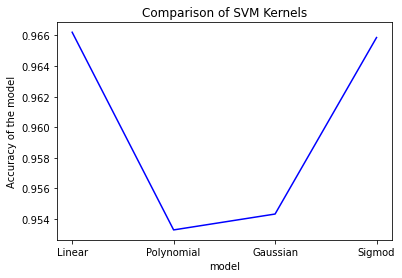

In [26]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array(["Linear","Polynomial","Gaussian","Sigmod"])
y = plot2

# plotting
plt.title("Comparison of SVM Kernels")
plt.xlabel("model")
plt.ylabel("Accuracy of the model")
plt.plot(x, y, color ="blue")
plt.show()

# Gradient Boosting

In [27]:
GB_model =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(xv_train,y_train)

#Fitting training set to the model
GB_model.fit(xv_train,y_train)

#Predicting the test set results based on the model
gb_y_pred = GB_model.predict(xv_test)

#Calculate the accurracy of this model
score = accuracy_score(y_test,gb_y_pred)
plot1.append(score)
print('Accuracy of GB model is ', score)

Accuracy of GB model is  0.9633260292930458


# ADA Boost

In [28]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(xv_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(xv_test)
score = accuracy_score(y_test,gb_y_pred)
plot1.append(score)
print('Accuracy of ADABOOST model is ', score)

Accuracy of ADABOOST model is  0.9633260292930458


# ADABoost with SVM linear kernal

In [29]:
from sklearn.ensemble import AdaBoostClassifier

# Import Support Vector Classifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=5, base_estimator=svc,learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(xv_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(xv_test)


# Model Accuracy, how often is the classifier correct?
score=metrics.accuracy_score(y_test, y_pred)
print("Accuracy of ADABOOST With SVM model is",score)
plot1.append(score)

Accuracy of ADABOOST With SVM model is 0.9624034136777765


# MLP

In [30]:
reg = MLPRegressor(hidden_layer_sizes=(64,64,64),activation="relu" ,random_state=1, max_iter=2000)
model=reg.fit(xv_train,y_train)
y_pred = model.predict(xv_test)
score = accuracy_score(y_test,gb_y_pred)
plot1.append(score)
print('Accuracy of MLP model is ', score)

Accuracy of MLP model is  0.9633260292930458


# Manual Testing

In [30]:
def fake_news_det(headlines):
    input_data = {"text":[headlines]}
    new_def_test = pd.DataFrame(input_data)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    #print(new_x_test)
    vectorized_input_data = vectorization.transform(new_x_test)
    prediction = DT_model.predict(vectorized_input_data)
    if prediction == 0:
        print("Not a Fake News")
    else:
        print("Fake News")

In [31]:
 fake_news_det("â€œThere have been five randomized controlled, placebo controlled trials that do not show any benefit to hydroxychloroquine.â€") 

Not a Fake News


# Tf-Idf Vectorizer

In [32]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
documentA = 'the man went out for a walk'
documentB = 'the children sat around the fire'

In [34]:
bagOfWordsA = documentA.split(' ')
bagOfWordsB = documentB.split(' ')

In [35]:
uniqueWords = set(bagOfWordsA).union(set(bagOfWordsB))

In [36]:
numOfWordsA = dict.fromkeys(uniqueWords, 0)
for word in bagOfWordsA:
    numOfWordsA[word] += 1
numOfWordsB = dict.fromkeys(uniqueWords, 0)
for word in bagOfWordsB:
    numOfWordsB[word] += 1

In [37]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [38]:
def computeTF(wordDict, bagOfWords):
    tfDict = {}
    bagOfWordsCount = len(bagOfWords)
    for word, count in wordDict.items():
        tfDict[word] = count / float(bagOfWordsCount)
    return tfDict

In [39]:
tfA = computeTF(numOfWordsA, bagOfWordsA)
tfB = computeTF(numOfWordsB, bagOfWordsB)

In [40]:
def computeIDF(documents):
    import math
    N = len(documents)
    
    idfDict = dict.fromkeys(documents[0].keys(), 0)
    for document in documents:
        for word, val in document.items():
            if val > 0:
                idfDict[word] += 1
    for word, val in idfDict.items():
        idfDict[word] = math.log(N / float(val))
    return idfDict

In [41]:
idfs = computeIDF([numOfWordsA,numOfWordsB])

In [42]:
def computeTFIDF(tfBagOfWords, idfs):
    tfidf = {}
    for word, val in tfBagOfWords.items():
        tfidf[word] = val * idfs[word]
    return tfidf

In [43]:
tfidfA = computeTFIDF(tfA, idfs)
tfidfB = computeTFIDF(tfB, idfs)
df = pd.DataFrame([tfidfA, tfidfB])
df

,out,children,went,the,around,sat,man,a,for,fire,walk
0,0.099021,0.000000,0.099021,0.0,0.000000,0.000000,0.099021,0.099021,0.099021,0.000000,0.099021
1,0.000000,0.115525,0.000000,0.0,0.115525,0.115525,0.000000,0.000000,0.000000,0.115525,0.000000


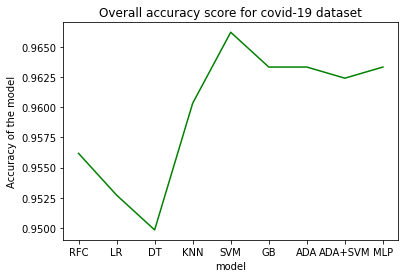

In [31]:

import numpy as np
import matplotlib.pyplot as plt

x = np.array(["RFC","LR","DT","KNN","SVM","GB","ADA","ADA+SVM","MLP"])
y = plot1

# plotting
plt.title("Overall accuracy score for covid-19 dataset")
plt.xlabel("model")
plt.ylabel("Accuracy of the model")
plt.plot(x, y, color ="green")
plt.show()


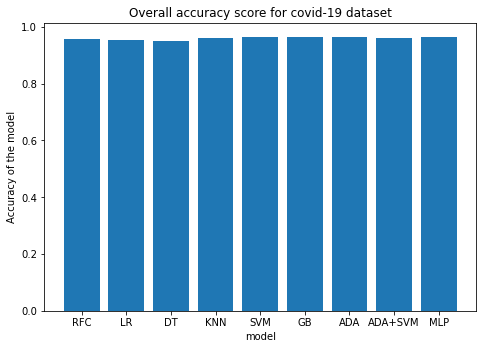

In [33]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = np.array(["RFC","LR","DT","KNN","SVM","GB","ADA","ADA+SVM","MLP"])
y = plot1
ax.bar(x,y)
plt.title("Overall accuracy score for covid-19 dataset")
plt.xlabel("model")
plt.ylabel("Accuracy of the model")
plt.show()